# Warren Truss Calculation
# By Frinze
### Import Modules and Dimension Definitions

In [1]:
from matplotlib.pyplot import cm
import numpy as np
import matplotlib.pyplot as plt
COMP_ROUND = 10
OUT_ROUND = 2

# Dimensions
X_LENGTH = 10
Y_LENGTH = 10
ANGLE = np.radians(45)

# Define CONSTANTS
F_DL = 20
X_DL = 3 * X_LENGTH
X_LL = 4 * X_LENGTH
# F_EL


def drawLine(m, c, header, color):  # y = mx + c
    x = np.arange(50)
    y = m * x + c
    if(np.sum(y) != 0):
        plt.plot(x, y, label=header, c=color)
        plt.annotate(header, xy=(49, y[49]), xytext=(30, 0), color=color,
                     textcoords="offset points",
                     size=14, va="center")
        plt.xlim([0, 50])
        plt.ylim([-2000, 2000])
        plt.legend(loc="upper left", bbox_to_anchor=(0, 1))

        # plt.savefig(header + ".png")


def drawEachMember(memberNames, members):
    plt.figure(figsize=(20, 10))
    plt.title("Forces of each Member")
    plt.ylabel("Force Experience (N)")
    plt.xlabel("Live Load (N)")

    color = iter(cm.rainbow(np.linspace(0, 1, len(memberNames))))
    for i in range(len(memberNames)):
        c = next(color)
        drawLine(members[i][0], members[i][1], memberNames[i], c)

    plt.savefig("a.png")
    plt.show()



### Calculation Results

In [2]:
# Definition of Members and Forces [m,c]
RA = np.array([F_DL * X_DL, X_LL]) / (X_LENGTH*8)
print("RA", RA)

RI = np.array([F_DL, 1])
RI = RI - RA
print("RI", RI)


# Member Definition
AJ = -RA / np.sin(ANGLE)
AB = RA

BJ = np.zeros((2))
BC = RA

JC = RA / np.sin(ANGLE)
JK = -2*RA

KC = np.zeros((2))
KL = -2 * RA

CL = -RA / np.sin(ANGLE)
CD = 3 * RA

DL = np.array([20.0, 0.0])
DE = 3 * RA

LE = (RA - np.array([20, 0])) / np.sin(ANGLE)
LM = -4 * RA + np.array([20, 0])

ME = np.zeros((2))
MN = -4 * RA + np.array([20, 0])

EN = (-RA + np.array([20, 1])) / np.sin(ANGLE)
EF = 5 * RA - np.array([40, 1])

FN = np.zeros((2))
FG = 5 * RA - np.array([40, 1])

NG = (RA - np.array([20, 0])) / np.sin(ANGLE)
NO = -6 * RA + np.array([60, 2])

OG = np.zeros((2))
OP = -6 * RA + np.array([60, 2])

GP = (-RA + np.array([20, 1])) / np.sin(ANGLE)
GH = 7 * RA - np.array([80, 3])

HP = np.zeros((2))
HI = 7 * RA - np.array([80, 3])

PI_1 = (RA - np.array([20, 0])) / np.sin(ANGLE)
PI_2 = (-7 * RA + np.array([80, 3])) / np.cos(ANGLE)


RA [7.5 0.5]
RI [12.5  0.5]


### Graphing

SUM OF MEMBERS 13.727922061357853
REPEATED MEMBERS: ['GH' 'LE' 'JK' 'AJ' 'LM' 'FG' 'BJ' 'AB' 'JC' 'NO' 'EN' 'DL' 'CD' 'PI_2']


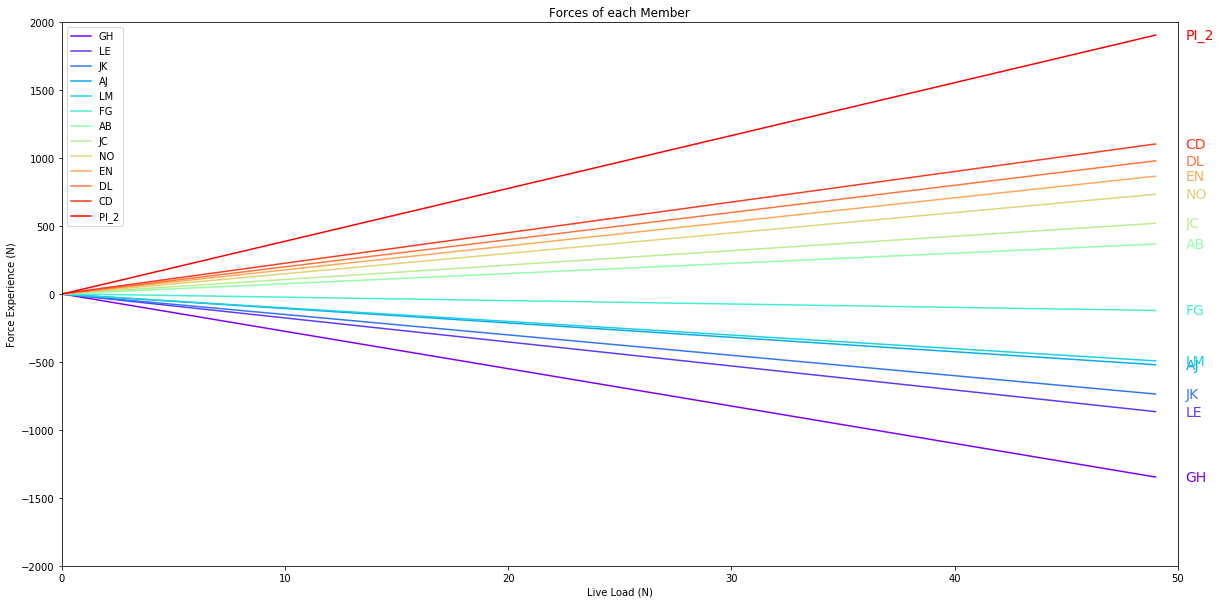

In [3]:
memberNames = np.array(['AJ', 'AB', 'BJ', 'BC', 'JC', 'JK', 'KC', 'KL', 'CL', 'CD', 'DL', 'DE', 'LE',
                        'LM', 'ME', 'MN', 'EN', 'FN', 'FG', 'NG', 'NO', 'OG', 'OP', 'GP', 'GH', 'HP', 'HI', 'PI_1', 'PI_2'])
members = np.array([AJ, AB, BJ, BC, JC, JK, KC, KL, CL, CD, DL, DE, LE,
                    LM, ME, MN, EN, FN, FG, NG, NO, OG, OP, GP, GH, HP, HI, PI_1, PI_2])

print("SUM OF MEMBERS", members.sum())
repeatMembers, index = np.unique(members, axis=0, return_index=True)
print("REPEATED MEMBERS:", memberNames[index])

drawEachMember(memberNames[index], members[index])